# UV map

In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import banana_lib

In [9]:
doe = pd.read_csv("../../data/doe.csv", index_col=None)
doe

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [11]:
workpath = "/Users/vitay/.CMVolumes/Fraunhofer/ML@Karoprod/MachineLearning/springback_uvmap"
output_file = '../../data/springback_uvmap.csv'

variables = ['u', 'v', 'x', 'y', 'z', 'thickness', 'epseqpl', 'thinning']

df = pd.DataFrame(columns = ['doe_id'] + variables)
df.to_csv(output_file, mode='w', index=False)

for f in sorted(os.listdir(workpath)):
    if not f.endswith(".h5"):
        continue

    # Get index
    idx_string = f[-10:-6]
    design = int(idx_string)
    print(design)

    if design in [3333, 5555, 7777]:
        continue

    # Open the file
    h5filepath = os.path.join(workpath, f)
    m = banana_lib.Model(design, h5filepath)
    m.fit()

    # Extract data
    data = m.nodes[variables]

    data.insert(0, "doe_id", design)

    data.to_csv(output_file, mode='a', header=False, index=False)
    

1
2
3
4
5
6
7
8
9
12
13
14
15
17
18
19
20
21
22
24
25
27
28
29
30
31
32
33
34
35
36
37
38
41
42
43
45
46
47
48
49
51
52
53
54
55
56
58
60
61
62
63
64
66
67
68
69
70
71
72
73
74
75
76
78
81
82
83
85
86
87
88
89
90
91
92
93
94
95
96
98
99
100
101
103
104
105
106
107
108
109
110
111
113
114
115
117
119
120
121
122
123
124
125
127
129
130
133
134
135
136
137
138
139
140
141
142
143
144
145
147
148
149
150
151
152
154
155
156
157
159
160
161
162
163
164
165
166
167
168
169
172
173
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
194
195
197
199
200
201
203
204
205
206
208
209
210
213
214
215
217
218
219
220
221
223
224
226
227
228
229
230
231
232
233
235
236
237
238
240
242
244
245
247
248
250
252
253
256
258
260
261
262
264
265
266
267
268
269
270
271
273
274
275
276
277
278
280
282
283
284
287
288
289
290
292
293
294
295
296
297
298
299
300
302
303
305
306
308
309
310
311
312
313
314
315
316
318
320
321
322
323
326
327
328
329
330
331
332
333
334
335
336
339
341
344

Just some test on a single file

In [5]:
workpath = "/Users/vitay/.CMVolumes/Fraunhofer/ML@Karoprod/MachineLearning/springback_uvmap"

for f in sorted(os.listdir(workpath)):
    if not f.endswith(".h5"):
        continue

    # Get index
    idx_string = f[-10:-6]
    design = int(idx_string)

    if design != 923:
        continue

    h5filepath = os.path.join(workpath, f)
    m = banana_lib.Model(design, h5filepath)
    m.fit()

    # Extract data
    data = m.nodes[['x', 'y', 'z']].to_numpy()

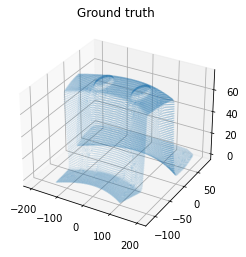

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Ground truth")
p = ax.scatter(
    data[:, 0],  
    data[:, 1],
    data[:, 2],
    s=0.005
)